<a href="https://colab.research.google.com/github/rsaran-BioAI/AGILE/blob/main/FashionMNIST_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from torchvision import datasets, transforms
import helper
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor, Lambda

In [4]:
# Download and load the training data
trainset = datasets.FashionMNIST('/content/drive/MyDrive/F_MNIST_data', download=True, train=True, transform=ToTensor())

In [5]:
print(trainset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/F_MNIST_data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [6]:
# Download and load the test data
testset = datasets.FashionMNIST('/content/drive/MyDrive/F_MNIST_data/', download=True, train=False, transform=ToTensor())
# 'transform=ToTensor()' converts each image into a tensor
# We could also write this line as: testset = datasets.FashionMNIST('/content/drive/MyDrive/F_MNIST_data/', download=True, train=False, transform=ToTensor(), target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))
# Here, the 'target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))' converts the labels into a one-hot encoded tensor.
# But upon doing this, the image will not get visualized so we will do that later.

In [7]:
print(testset)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/F_MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [8]:
import matplotlib.pyplot as plt
# 'transform=ToTensor()' converts each image into a tensor
# We could also write this line as: testset = datasets.FashionMNIST('/content/drive/MyDrive/F_MNIST_data/', download=True, train=False, transform=ToTensor(), target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))
# Here, the 'target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))' converts the labels into a one-hot encoded tensor.
# But upon doing this, the image will not get visualized so we will do that later.

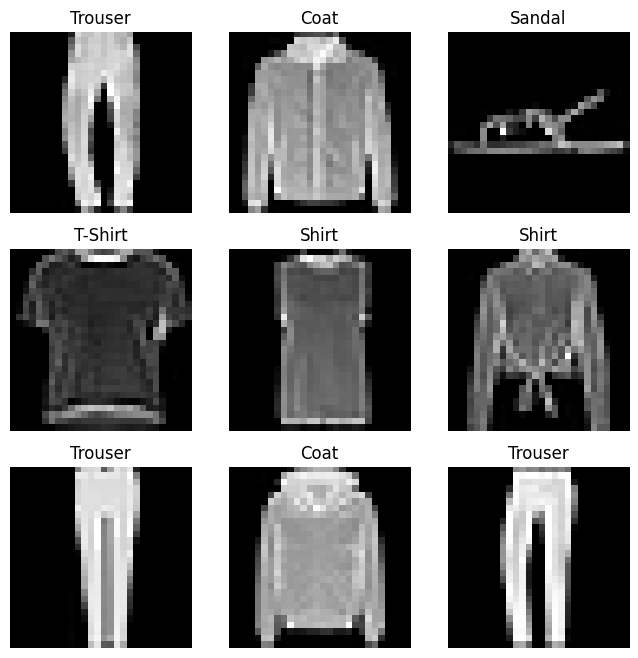

In [9]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Preparing your data for training with DataLoaders

In [10]:
# The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”...
# ...reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

# DataLoader is an iterable that abstracts this complexity for us in an easy API.

from torch.utils.data import DataLoader

train_dataloader = DataLoader(trainset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testset, batch_size=64, shuffle=True)

# If we did not import Dataloader seperately we can write:
# train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# test_dataloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [11]:
# Checking what 'train_dataLoader' looks like
train_dataloader

In [12]:
# Checking what 'test_dataloader' looks like
test_dataloader

## Iterate through the DataLoader

In [13]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0196,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

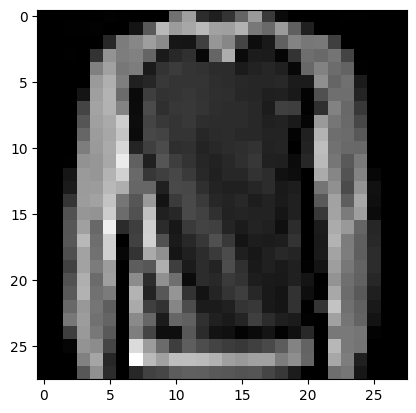

Label: 2


In [14]:
# We have loaded that dataset into the DataLoader and can iterate through the dataset as needed.
# Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively).
#Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

train_features, train_labels = next(iter(train_dataloader)) # This means that 'DataLoader' function returns two values: train_features and train_labels
print(train_features)
print(train_labels)
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [15]:
# Transforming the labels into a one-hot encoded tensor
trainset.target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
testset.target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0275,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.2039,  ..., 0.0980, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

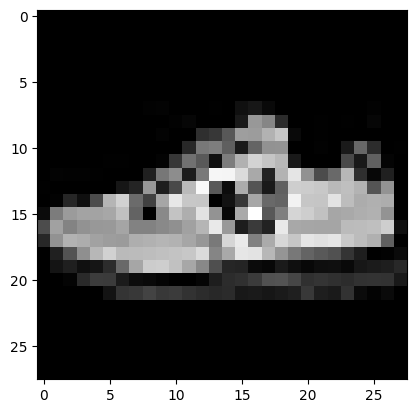

Label: tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])


In [16]:
# We have loaded that dataset into the DataLoader and can iterate through the dataset as needed.
# Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively).
#Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

train_features, train_labels = next(iter(train_dataloader)) # This means that 'DataLoader' function returns two values: train_features and train_labels
print(train_features)
print(train_labels)
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Creating a Custom Dataset for your files

In [17]:
import os
import pandas as pd
from torchvision.io import read_image

In [18]:
class CustomImageDataset(Dataset):
    # The __init__ function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    # The __len__ function returns the number of samples in our dataset.
    def __len__(self):
        return len(self.img_labels)

    # The __getitem__ function loads and returns a sample from the dataset at the given index idx.
    #Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image...
    # ...retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable)...
    # ...and returns the tensor image and corresponding label in a tuple.
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## Get Device for training

In [19]:
# We want to be able to train our model on a hardware accelerator like the GPU or MPS, if available.
# Let’s check to see if torch.cuda or torch.backends.mps are available, otherwise we use the CPU.

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


## Building the Neural Network

In [20]:
# import os # Imported before
# import torch # Imported before
from torch import nn
# from torch.utils.data import DataLoader # Imported before
# from torchvision import datasets, transforms # Imported before

In [21]:
# We define our neural network by subclassing nn.Module, and initialize the neural network layers in __init__.
# Every nn.Module subclass implements the operations on input data in the forward method.

class NeuralNetwork(nn.Module): # Defining a new class NeuralNetwork that inherits from PyTorch's nn.Module. This inheritance is necessary for any custom neural network model in PyTorch.

    def __init__(self): # The initialization method sets up the layers of the neural network.
        super().__init__() # The super().__init__() call is ensuring that the initialization from the parent nn.Module class is also executed.
        self.flatten = nn.Flatten() # This layer will flatten its input. For image data, it converts a 2D image into a 1D tensor.
        self.linear_relu_stack = nn.Sequential( # This defines a sequential stack of layers, including three linear (fully connected) layers separated by ReLU activations.
                                                # The last linear layer has 10 output units, corresponding to 10 classes for classification.
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    # ReLU, which stands for Rectified Linear Unit, is a type of activation function that is widely used in deep neural networks and deep learning models.
    # The function itself is quite simple and is defined as: f(x)=max(0,x)
    # This means that if the input x is positive, it returns x, and if the input x is negative (or zero), it returns 0.
    # Graphically, the function looks like a ramp: it's flat at and below zero, and then increases linearly above zero.

    def forward(self, x): # This method defines the forward pass of the neural network.
                          # When you call the network on some input x, this method will be executed.
                          # It first flattens the input, then passes it through the stack of linear and ReLU layers, and finally returns the output 'nn_output'.
        x = self.flatten(x)
        nn_output = self.linear_relu_stack(x)
        return nn_output

In [22]:
# We create an instance of NeuralNetwork, and move it to the device, and print its structure.
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [23]:
# Calling the model on the input returns a 2-dimensional tensor with dim=0 corresponding to each output of 10 raw predicted values for each class...
# ...and dim=1 corresponding to the individual values of each output.
X = torch.rand(1, 28, 28, device=device) # creating a random tensor
logits = model(X)
print(X.size())
print(logits.size())
print(logits[0])

torch.Size([1, 28, 28])
torch.Size([1, 10])
tensor([-0.0432,  0.0106, -0.0206, -0.0343, -0.0775, -0.0508,  0.0133,  0.0484,
         0.0038,  0.0168], grad_fn=<SelectBackward0>)


In [24]:
# We get the prediction probabilities by passing it through an instance of the nn.Softmax module.
pred_probab = nn.Softmax(dim=1)(logits)
print(pred_probab)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

tensor([[0.0970, 0.1024, 0.0992, 0.0979, 0.0937, 0.0963, 0.1026, 0.1063, 0.1017,
         0.1030]], grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([7])
